> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (No Show Appointments - kagglev2 , may/2016)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



## Questions we are trying to answer :


1 - what is the overall appointment show-up vs. no show-up rate

2 - what are the most feature that matter the most of (Age,Gender,Scholarship), to make the patient make it to his appiontment?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Load the data. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

#printing first five rows with defined columns of noshowappointments database
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# null columns
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning & Looking for Data that need to be cleaned

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# check if there is a duplicate in the data 
sum(df.duplicated())

#check if there is an age with minus or 0 value
df[df["Age"] <= 0]

# in the data (there is patient has the exactly the age 0 or less)
meanAge = df['Age'].mean()
df[df['Age'] <= 0] = meanAge

In [6]:
# Generates descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.425642e+14,5.493660e+06,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806
std,2.530289e+14,1.001764e+06,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885
min,3.708887e+01,3.708887e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.251883e+12,5.636216e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.697449e+13,5.678212e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.231455e+13,5.723640e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


In [7]:
# list of column to be deleted because we don't need them 
delete_col=['ScheduledDay','AppointmentDay','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

# deleting the columns
df= df.drop(delete_col,1)


In [8]:
#rename columns
df.rename(columns = {'No-show':'No_show'}, inplace = True)

In [9]:
# previewing the new dataset
df.head(4)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,No_show
0,2.987250e+13,5642903.0,F,62.0,JARDIM DA PENHA,0.0,No
1,5.589978e+14,5642503.0,M,56.0,JARDIM DA PENHA,0.0,No
2,4.262962e+12,5642549.0,F,62.0,MATA DA PRAIA,0.0,No
3,8.679512e+11,5642828.0,F,8.0,PONTAL DE CAMBURI,0.0,No


In [10]:
#convert no show data to 0 and 1 instead of 'yes' and 'no' so we can handle using plot 
df.No_show[df['No_show'] == 'Yes'] = '1'
df.No_show[df['No_show'] == 'No'] = '0'
df['No_show'] = pd.to_numeric(df['No_show'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# create a mask for patient who came
showed = df['No_show'] == 0
not_showed = df['No_show'] == 1
df['showed'] = showed
df['not_showed'] = not_showed

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( What is the overall appointment show-up vs. no show-up rate)

77.18204601590561


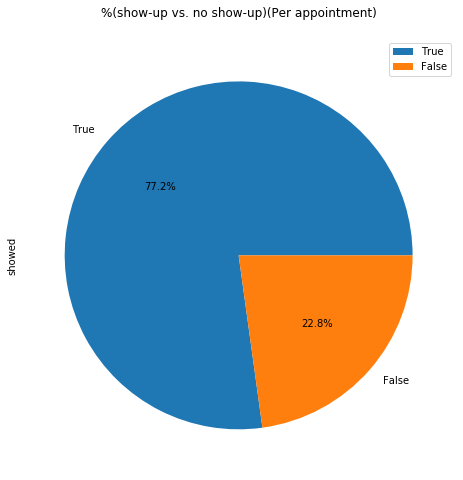

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# making a pie chart to have the percentage of who showed up and who is not¶
all_patient = df['showed'].value_counts()
print(all_patient[1] / all_patient.sum() * 100)
pieChart = all_patient.plot.pie(figsize=(8,8), autopct='%1.1f%%', fontsize = 10);
pieChart.set_title('%'+"(show-up vs. no show-up)" + '(Per appointment)\n', fontsize = 12);
plt.legend();


The plot shows that %77 of patients show up for their appointment

## Research Question 2  (  What are the most feature that matter the most of (Age,Gender,Scholarship), to make the patient make it to his appiontment?)

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#printing first five rows with defined columns
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,No_show,showed,not_showed
0,2.987250e+13,5642903.0,F,62.0,JARDIM DA PENHA,0.0,0.0,True,False
1,5.589978e+14,5642503.0,M,56.0,JARDIM DA PENHA,0.0,0.0,True,False
2,4.262962e+12,5642549.0,F,62.0,MATA DA PRAIA,0.0,0.0,True,False
3,8.679512e+11,5642828.0,F,8.0,PONTAL DE CAMBURI,0.0,0.0,True,False
4,8.841186e+12,5642494.0,F,56.0,JARDIM DA PENHA,0.0,0.0,True,False


### Print the average age of patients who show up and people who didn't:

In [14]:
df.Age[showed].mean()

39.07518726482

In [15]:
df.Age[not_showed].mean()

35.329151291512915

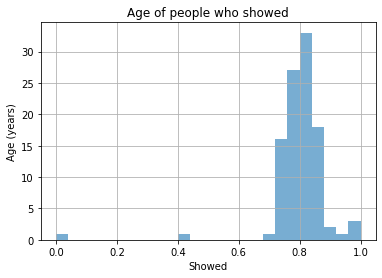

In [16]:
#plotting a histogram of the average age of patinet who show up

df.groupby('Age')['showed'].mean().hist(alpha=0.6,bins=25,label='show');
#On x-axis 
plt.xlabel("Showed")
#On y-axis 
plt.ylabel("Age (years)")
plt.title("Age of people who showed")

#displays the plot
plt.show()


The average age who patients show up is equal 39 years

### Print the gender of patients who show up :

Gender
37.08887421173107    0.000000
F                    0.796415
M                    0.799154
Name: showed, dtype: float64


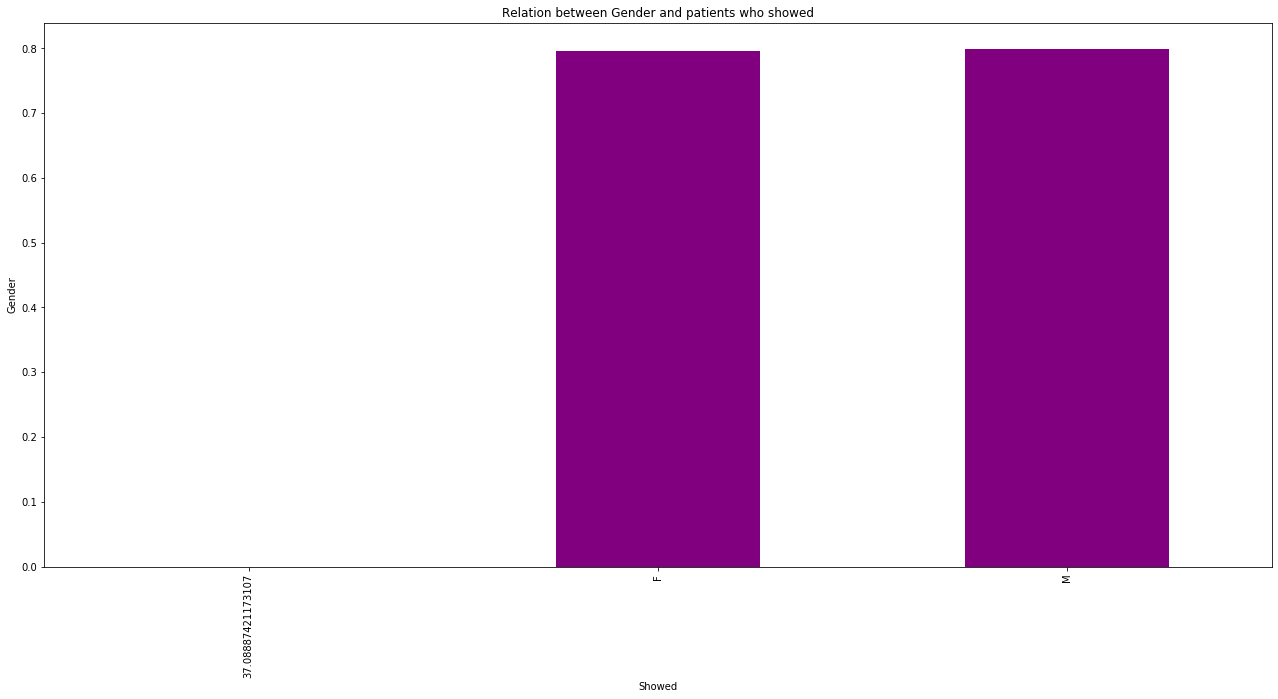

In [17]:
# see the relation between Gender and Pateints who showed up

print(df.groupby('Gender')['showed'].mean())
df.groupby('Gender')['showed'].mean().plot(kind='bar',figsize=(22,10),color='purple');
plt.xlabel("Showed")
plt.ylabel("Gender")
plt.title("Relation between Gender and patients who showed")
plt.show()

 The number of female patients who show up is approximately equal to the number of male patients who show up


### Completing the visualiztion to see what is the feature that affect patients to come:

Scholarship
0.000000     0.801316
1.000000     0.762143
37.088874    0.000000
Name: showed, dtype: float64


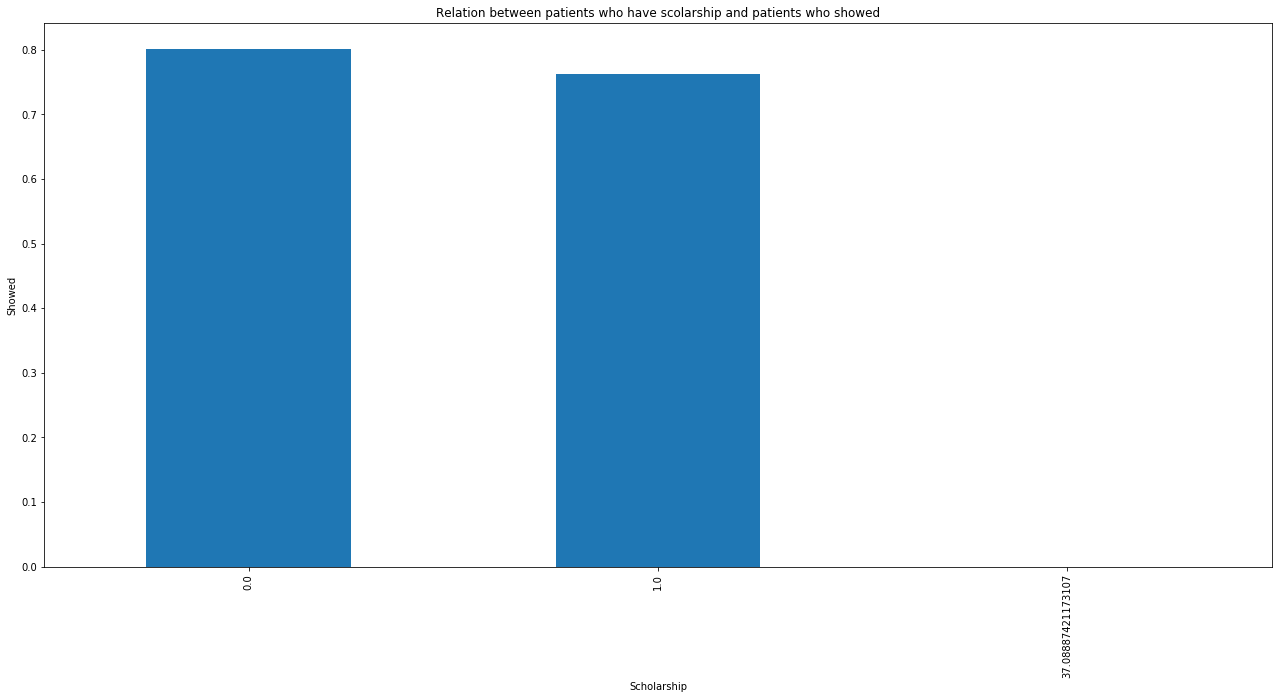

In [18]:
#See the relation between people who has scholarship and people who showed up

print(df.groupby('Scholarship')['showed'].mean())
df.groupby('Scholarship')['showed'].mean().plot(kind ='bar',figsize=(22,10))
plt.xlabel("Scholarship")
plt.ylabel("Showed")
plt.title("Relation between patients who have scolarship and patients who showed")
plt.show()

‘Scholarship’ indicates whether =(1) or not the patient is enrolled in Brasilian welfare program Bolsa Família = (0).


<a id='conclusions'></a>
## Conclusions


• As we can see in our investigation the Age is the most important factor that decided if a patient would come or not

the average of age for people who will be most likely to show up is 39.07 , and the average age for people who

are not likely to show up is 35.32 .

• As we can see most of people who has Scholarship are most likely to miss thier appointments with a percentage of

76.2% of showing and patients who don't have a scholarship have the percentage 80.1%

• The feature gender is not a factor to decide if the person would come to his appointment or not!

## Limitations:
-There is no null values in data file

-There we some illogical data such as patients with age 0 or less

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295